In [2]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys

In [3]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.01]
teff = [4750, 100]
bp_rp = [1.34, 0.01]

In [4]:
# Initialize a jam session with a single star:
jam_sess = session(ID = [kic], numax = [numax], dnu = [dnu], teff = [teff], bp_rp = [bp_rp], 
                   nthreads=1, use_cached=False)

In [5]:
# Result is always a list of star class instances
# Taking the first one as an example
star = jam_sess.stars[0]

In [6]:
star.asymptotic_modeid(norders = 7)

Burningham
Sampling


In [7]:
print(star.asy_result.modeID)

    ell       nu_mu    nu_std
0     2  157.479845  0.039577
1     0  159.685979  0.037479
2     2  174.077756  0.023686
3     0  176.284283  0.020948
4     2  190.801332  0.016001
5     0  193.008846  0.012676
6     2  207.650383  0.013828
7     0  209.858359  0.010488
8     2  224.625779  0.012851
9     0  226.832581  0.009245
10    2  241.726296  0.015341
11    0  243.932880  0.012022
12    2  258.951901  0.026796
13    0  261.158658  0.024564


In [8]:
print(star.asy_result.summary)

           numax        dnu       eps     alpha       d02  env_height  \
best  224.173957  17.014354  1.331846  0.007213  2.209915    4.310292   
mean  222.620686  17.006419  1.337812  0.007385  2.207053    4.302393   
std     1.530306   0.010658  0.008266  0.000386  0.015858    0.009221   
skew   -0.515926  -1.010616  0.985672 -0.076300  0.003906   -1.769645   
2nd   216.303750  16.959229  1.326143  0.005895  2.152171    4.242842   
16th  217.419799  16.963897  1.326458  0.006153  2.161832    4.255023   
50th  218.024983  16.971045  1.326766  0.006342  2.167625    4.264173   
84th  218.418462  16.973939  1.326899  0.006418  2.170445    4.268525   
97th  218.521538  16.974673  1.326974  0.006436  2.171167    4.270242   

      env_width  mode_width         teff     bp_rp  
best  57.154365   -0.305897  4873.586304  1.341438  
mean  57.543807   -0.314553  4876.797297  1.338301  
std    0.561027    0.011606    72.867945  0.009983  
skew   2.524933    0.054188     0.048425 -0.062315  
2nd 

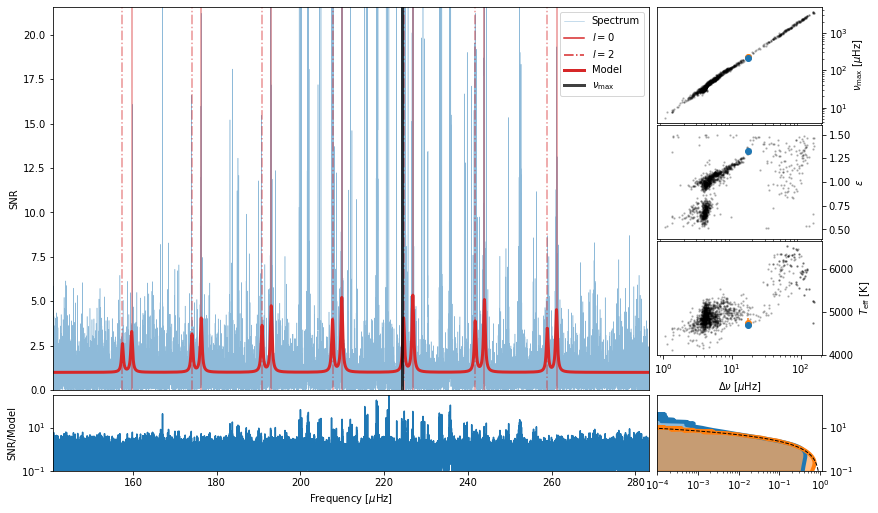

In [9]:
fig = star.plot_asyfit()

In [103]:
from pbjam import peakbag 
import pymc3 as pm
import importlib

In [118]:
importlib.reload(peakbag)
pb = peakbag.peakbag(star.f, star.s, star.asy_result)

{'l0': array([159.68597923, 176.28428332, 193.00884583, 209.8583593 ,
       226.83258082, 243.93287957, 261.15865835]), 'l2': array([157.4798454 , 174.07775569, 190.80133183, 207.65038317,
       224.62577873, 241.72629553, 258.95190073]), 'width0': array([0.52305485, 0.49143339, 0.54982087, 0.47358484, 0.50857799,
       0.52673828, 0.42346194]), 'width2': array([0.49442766, 0.49442766, 0.49442766, 0.49442766, 0.49442766,
       0.49442766, 0.49442766]), 'height0': array([2.28065199, 3.03425859, 3.71485939, 4.17718478, 4.30563172,
       4.06026212, 3.49605536]), 'height2': array([1.59645639, 2.12398101, 2.60040157, 2.92402935, 3.0139422 ,
       2.84218348, 2.44723875]), 'back': array([1., 1., 1., 1., 1., 1., 1.])}
[8, 9, 10, 11, 12, 13, 14]


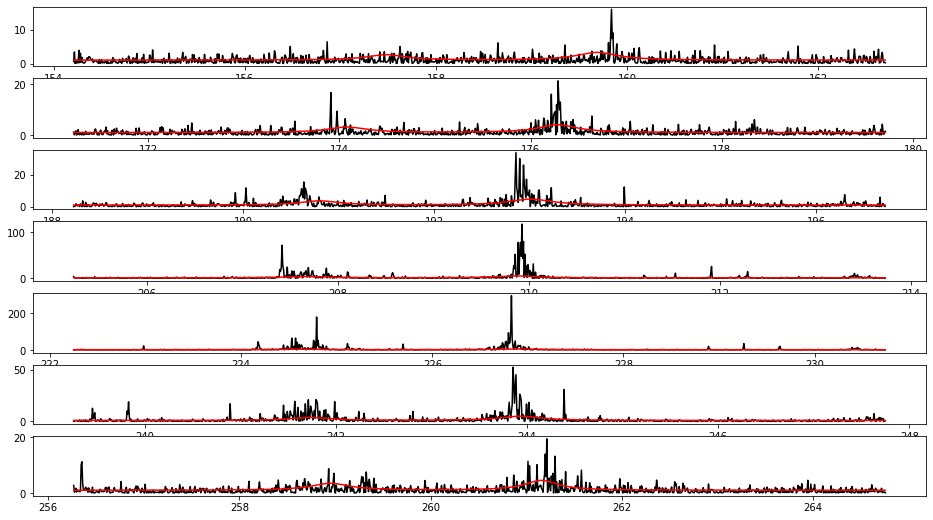

In [119]:
pb.plot_start_model()

[[0.        ]
 [0.16666667]
 [0.33333333]
 [0.5       ]
 [0.66666667]
 [0.83333333]
 [1.        ]]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, ln_width2_rotated_, ln_width0_rotated_, l2, l0]
Sampling 4 chains: 100%|██████████| 18000/18000 [04:41<00:00, 64.00draws/s]
The acceptance probability does not match the target. It is 0.8834609375694397, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8848192106145302, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


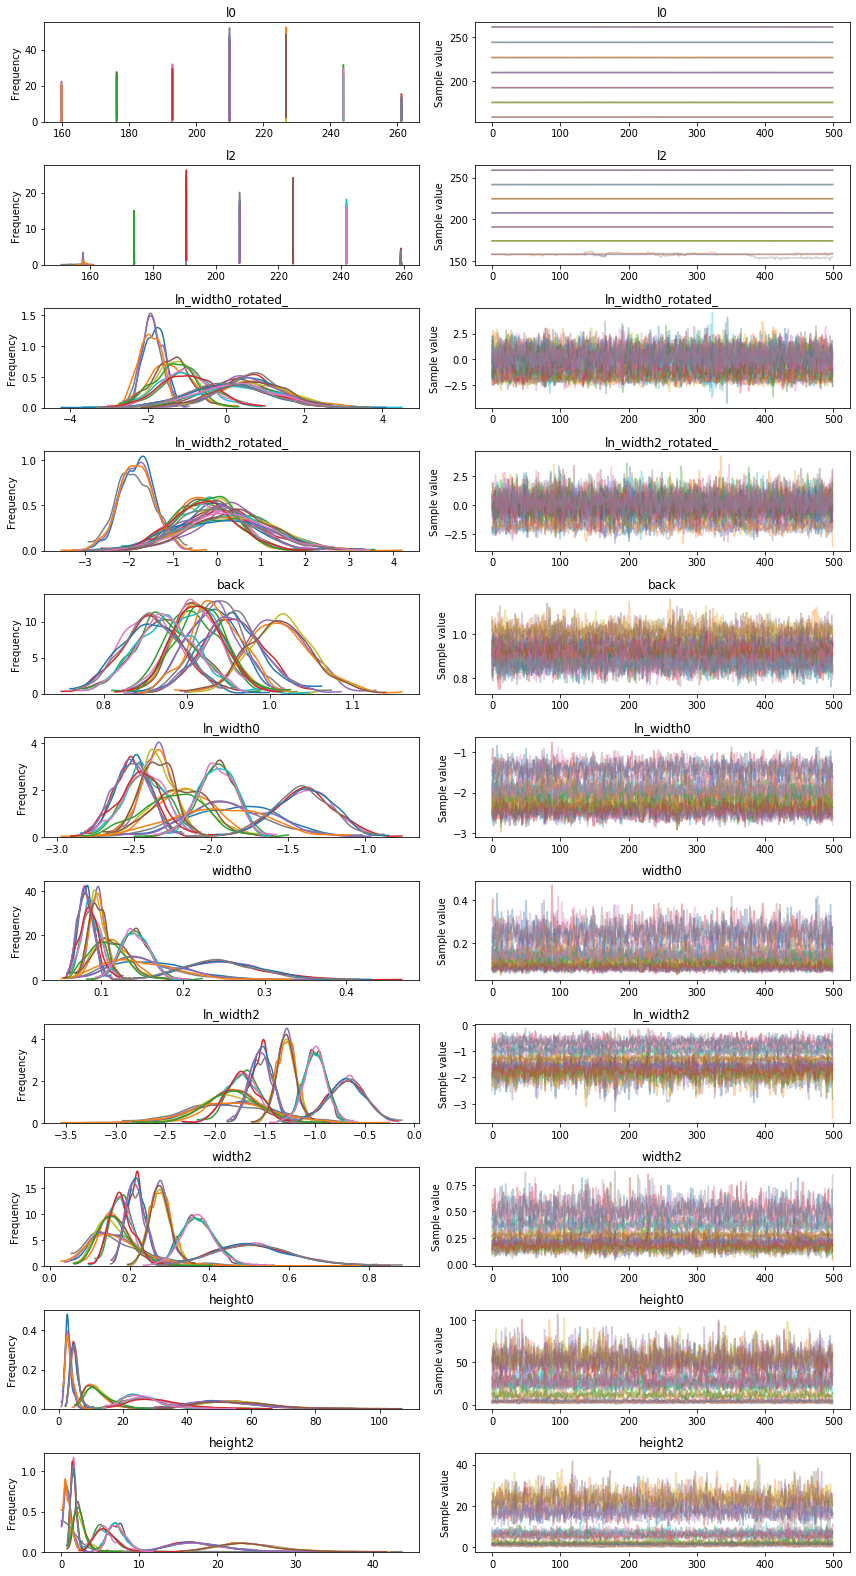

In [125]:
pb.sample(model_type='width_gp', cores=4, tune=4000)

In [126]:
pm.summary(pb.samples)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
l0__0,159.839586,0.019589,0.000347,159.800997,159.877383,2935.627823,0.999051
l0__1,176.268900,0.015032,0.000212,176.239115,176.297837,5118.167513,0.999324
l0__2,192.918760,0.012889,0.000228,192.894163,192.943072,3391.569451,0.999103
l0__3,209.924440,0.007798,0.000125,209.910452,209.940368,3556.766347,0.999157
l0__4,226.816702,0.008329,0.000129,226.801221,226.834217,3900.182866,0.999680
l0__5,243.883557,0.013934,0.000204,243.854154,243.908848,3664.001900,1.000469
l0__6,261.204790,0.027569,0.000424,261.150675,261.260631,4122.279904,0.999362
l2__0,157.540985,1.204538,0.110593,153.289401,159.064309,14.132913,1.111687
l2__1,173.951536,0.026801,0.000512,173.902046,174.006286,2721.756166,0.999397
l2__2,190.621294,0.018509,0.000318,190.581889,190.655873,3598.617669,0.999641


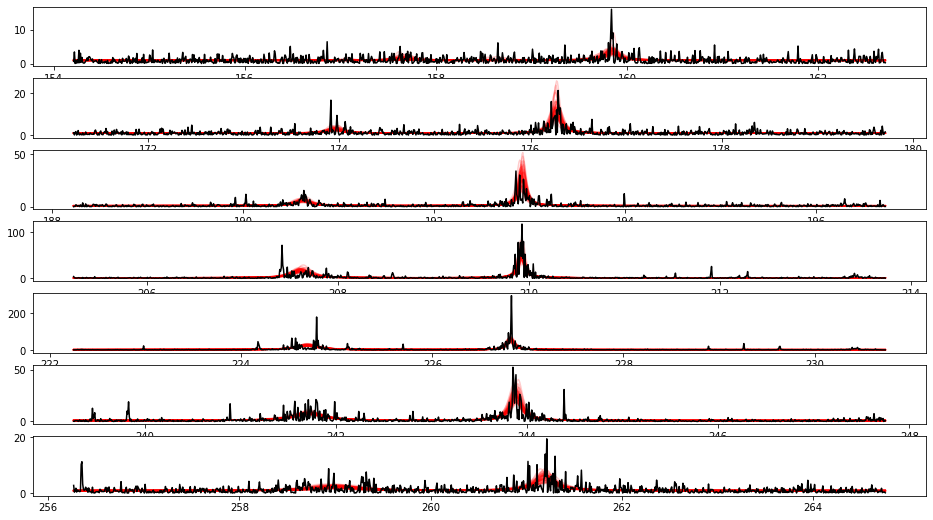

In [127]:
pb.plot_fit(thin=10)

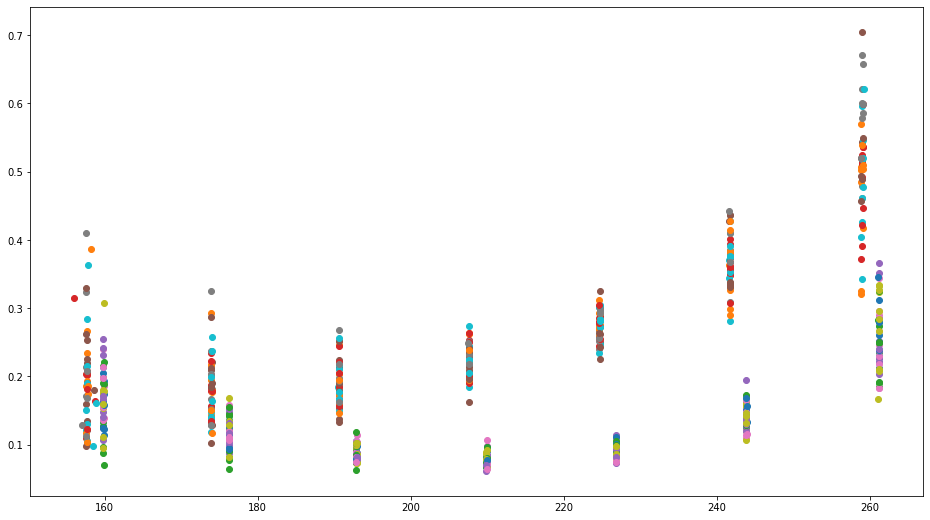

In [128]:
pb.plot_linewidth(thin=10)

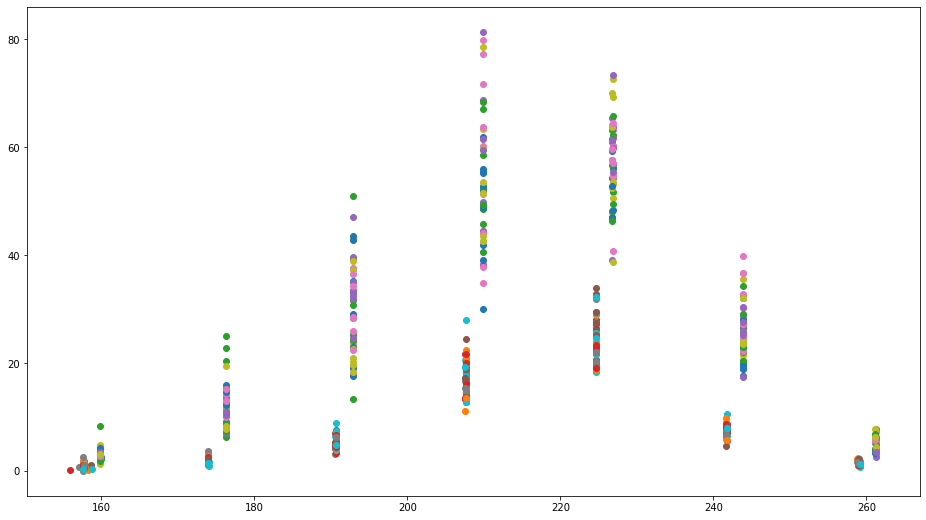

In [129]:
pb.plot_height(thin=10)